In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import glob

In [124]:
path ='./data'
allFiles = glob.glob(os.path.join(path, "*.csv"))
print(allFiles)

['./data/201908-citibike-tripdata.csv', './data/201910-citibike-tripdata.csv', './data/201909-citibike-tripdata.csv']


In [28]:
lst = []
for file in allFiles:
    df = pd.read_csv(file, index_col=None, header=0)
    lst.append(df)

df = pd.concat(lst, axis = 0, ignore_index= True)
print("Number of rows: %d; number of columns: %d" % df.shape)
df.head()

Number of rows: 6881697; number of columns: 15


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2


In [120]:
#to transform time into ordinal numbers. Each number represent a 30min time periods.
def ToRealTime(t):
    date = t.split(" ")[0]
    time = t.split(" ")[1]
    hours = int(time.split(":")[0])
    minutes = int(time.split(":")[1])
    seconds = int(time.split(":")[2].split(".")[0])
    return (hours * 3600 + minutes * 60 + seconds) // (60 * 30)    

In [30]:
df["abs_starttime"] = df.apply(lambda x: ToRealTime(x['starttime']), axis = 1)
df["abs_stoptime"] = df.apply(lambda x: ToRealTime(x['stoptime']), axis = 1)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,abs_starttime,abs_stoptime
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2,0,0
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2,0,0
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1,0,0
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1,0,0
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2,0,0


In [31]:
## Only keep the rides within the time window of 7:30 am to 9:30 pm, i.e. time to go to work
rangeStart = ToRealTime("2019-08-01 07:30:00.0000")
rangeEnd = ToRealTime("2019-08-01 09:30:00.0000")

df = df.loc[(df["abs_starttime"] >= rangeStart) & 
            (df["abs_starttime"] < rangeEnd) & 
            (df["abs_stoptime"] >= rangeStart) & 
            (df["abs_stoptime"] < rangeEnd)]

print("Number of rows: %d; number of columns: %d" % df.shape)
df.head()

Number of rows: 874043; number of columns: 17


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,abs_starttime,abs_stoptime
6398,446,2019-08-01 07:30:01.7290,2019-08-01 07:37:28.2290,3641.0,Broadway & W 25 St,40.742869,-73.989186,434.0,9 Ave & W 18 St,40.743174,-74.003664,38480,Subscriber,1974,1,15,15
6399,923,2019-08-01 07:30:01.7820,2019-08-01 07:45:25.0840,508.0,W 46 St & 11 Ave,40.763414,-73.996674,3686.0,Gansevoort St & Hudson St,40.739448,-74.005070,39868,Subscriber,1984,1,15,15
6400,209,2019-08-01 07:30:01.9520,2019-08-01 07:33:31.8020,446.0,W 24 St & 7 Ave,40.744876,-73.995299,402.0,Broadway & E 22 St,40.740343,-73.989551,39952,Subscriber,1987,1,15,15
6401,1134,2019-08-01 07:30:03.2190,2019-08-01 07:48:57.3060,3124.0,46 Ave & 5 St,40.747310,-73.954510,305.0,E 58 St & 3 Ave,40.760958,-73.967245,32387,Subscriber,1981,1,15,15
6402,197,2019-08-01 07:30:03.2930,2019-08-01 07:33:20.9680,326.0,E 11 St & 1 Ave,40.729538,-73.984267,3263.0,Cooper Square & Astor Pl,40.729515,-73.990753,35076,Subscriber,1988,2,15,15


In [32]:
start_cols = ["start station id", "abs_starttime", 
              "start station name", "start station latitude", 
              "start station longitude"]
stop_cols = ["end station id", "abs_stoptime", 
             "end station name","end station latitude", 
             "end station longitude"]

In [33]:
start_point_df = df.groupby(start_cols).size().reset_index(name='start_point_counts').sort_values(by=['start_point_counts'],ascending = False)
stop_point_df = df.groupby(stop_cols).size().reset_index(name='stop_point_counts').sort_values(by=["stop_point_counts"], ascending=False)
start_point_df.head(10)


,start station id,abs_starttime,start station name,start station latitude,start station longitude,start_point_counts
486,358.0,17,Christopher St & Greenwich St,40.732916,-74.007114,3589
966,514.0,17,12 Ave & W 40 St,40.760875,-74.002777,3042
986,519.0,17,Pershing Square North,40.751873,-73.977706,3026
738,445.0,17,E 10 St & Avenue A,40.727408,-73.981420,2388
985,519.0,16,Pershing Square North,40.751873,-73.977706,2280
485,358.0,16,Christopher St & Greenwich St,40.732916,-74.007114,2258
965,514.0,16,12 Ave & W 40 St,40.760875,-74.002777,2162
1628,3255.0,15,8 Ave & W 31 St,40.750585,-73.994685,2076
978,517.0,17,Pershing Square South,40.751581,-73.977910,1947
298,301.0,17,E 2 St & Avenue B,40.722174,-73.983688,1910


In [34]:
stop_point_df.head(10)

,end station id,abs_stoptime,end station name,end station latitude,end station longitude,stop_point_counts
490,359.0,17,E 47 St & Park Ave,40.755103,-73.974987,4271
623,402.0,18,Broadway & E 22 St,40.740343,-73.989551,4200
622,402.0,17,Broadway & E 22 St,40.740343,-73.989551,3442
690,426.0,17,West St & Chambers St,40.717548,-74.013221,3270
986,519.0,17,Pershing Square North,40.751873,-73.977706,3086
489,359.0,16,E 47 St & Park Ave,40.755103,-73.974987,3036
491,359.0,18,E 47 St & Park Ave,40.755103,-73.974987,2967
2856,3664.0,16,North Moore St & Greenwich St,40.720195,-74.010301,2913
987,519.0,18,Pershing Square North,40.751873,-73.977706,2908
691,426.0,18,West St & Chambers St,40.717548,-74.013221,2705


In [52]:
begin = ToRealTime("2019-08-01 07:30:00.0000")
end = ToRealTime("2019-08-01 09:30:00.0000")

def barplot(df, isStart):
    abstime = ""
    stationname = ""
    countname = ""
    if isStart:
        abstime = "abs_starttime"
        stationname = "start station name"
        countname = "start_point_counts"
    else:
        abstime = "abs_stoptime"
        stationname = "end station name"
        countname = "stop_point_counts"
    lst1=[]
    lst2=[]
    lst3=[]
    for i in range(begin,end):
        lst1.append(int(df[(df[abstime]==i) & (df[stationname]== "Christopher St & Greenwich St")][countname]))
        lst2.append(int(df[(df[abstime]==i) & (df[stationname]== "12 Ave & W 40 St")][countname]))
        lst3.append(int(df[(df[abstime]==i) & (df[stationname]== "Pershing Square North")][countname]))
        
        
    x_abstime = np.array(range(begin, end))
    width = 0.2
    plt.bar(x_abstime-width, lst1,width,color='b',align="center",label = "Christopher St & Greenwich St")
    plt.bar(x_abstime, lst2,width,color='r',align="center",label = "12 Ave & W 40 St")
    plt.bar(x_abstime+width, lst3,width,color='g',align="center",label = "Pershing Square North")

    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Time period')
    plt.ylabel(countname)
    plt.xticks(range(begin,end),["7:30-8:00", "8:00-8:30","8:30-9:00","9:00-9:30"])
    plt.show()

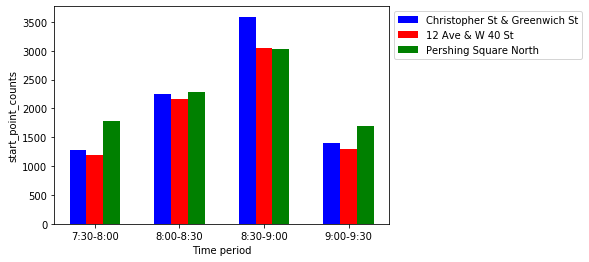

In [53]:
barplot(start_point_df, True)

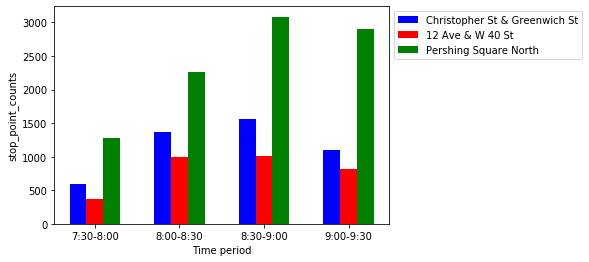

In [54]:
barplot(stop_point_df, False)

In [55]:
## Use K-means to cluster the "busy Start poins"
from sklearn.cluster import KMeans

def get_Xs(df, isStart):
    xs = []
    latitude, longitude = "", ""
    if isStart:
        latitude, longitude = "start station latitude", "start station longitude"
    else:
        latitude, longitude = "end station latitude", "end station longitude"

    for index, row in df.head(150).iterrows():
        xs.append([row[latitude], row[longitude]])
    xs = np.array(xs)
    return xs

start_points = get_Xs(start_point_df, True)
stop_points = get_Xs(stop_point_df, False)

start_scores = []
stop_scores = []

for K in range(1, 50):
    start_points_kmeans = KMeans(n_clusters=K, random_state=0).fit(start_points)
    stop_points_kmeans = KMeans(n_clusters=K, random_state=0).fit(stop_points)
    start_scores.append(start_points_kmeans.score(start_points))
    stop_scores.append(stop_points_kmeans.score(stop_points))

print(start_scores[:5])
print(stop_scores[:5])

[-0.06511997958659776, -0.0345345757650648, -0.024829511708958307, -0.016595597793639172, -0.012846168438045424]
[-0.06506016568619089, -0.02620847714933916, -0.0134347848370453, -0.01070333222469344, -0.008661447974191105]


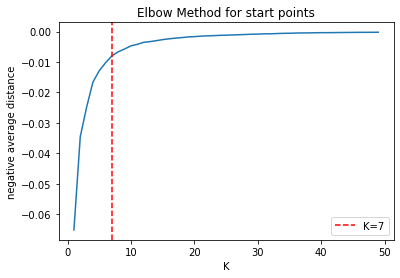

In [87]:
plt.plot(range(1, 50), start_scores)
plt.xlabel("K")
plt.ylabel("negative average distance")
plt.title("Elbow Method for start points")
plt.axvline(x=7, label="K=7", c = 'r', linestyle='--')
plt.legend()
plt.show()

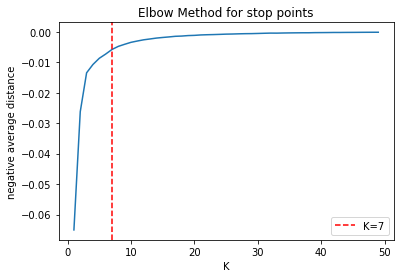

In [88]:
plt.plot(range(1, 50), stop_scores)
plt.xlabel("K")
plt.ylabel("negative average distance")
plt.title("Elbow Method for stop points")
plt.axvline(x=7, label="K=7", c = 'r', linestyle='--')
plt.legend()
plt.show()

In [89]:
start_points_kmeans = KMeans(n_clusters=7, random_state=0).fit(start_points)
stop_points_kmeans = KMeans(n_clusters=7, random_state=0).fit(stop_points)
print("Busy Start point cluster centers (x: latitude; y: longitude)")
print(start_points_kmeans.cluster_centers_)
print("Busy End point cluster centers (x: latitude; y: longitude)")
print(stop_points_kmeans.cluster_centers_)
print("Busy Start Point cluster assignment")
print(start_points_kmeans.labels_)
print("Busy Stop Point cluster assignment")
print(stop_points_kmeans.labels_)

Busy Start point cluster centers (x: latitude; y: longitude)
[[ 40.7728178  -73.9576484 ]
 [ 40.73890525 -74.00268105]
 [ 40.72762838 -73.98362993]
 [ 40.76945545 -73.98467842]
 [ 40.74781299 -73.97645534]
 [ 40.71373732 -74.01388043]
 [ 40.75322113 -73.99427868]]
Busy End point cluster centers (x: latitude; y: longitude)
[[ 40.73786071 -73.99073356]
 [ 40.70998868 -74.01180449]
 [ 40.75776516 -73.97680571]
 [ 40.72453074 -74.00471845]
 [ 40.74672556 -74.00423725]
 [ 40.74974432 -73.98876282]
 [ 40.70140317 -73.9867267 ]]
Busy Start Point cluster assignment
[1 6 4 2 4 1 6 6 4 2 2 2 6 4 2 2 4 2 2 2 3 2 6 6 2 4 2 2 2 6 4 4 6 6 2 1 6
 2 4 2 3 2 2 2 2 6 5 3 1 4 1 1 2 2 6 4 2 2 0 6 2 2 3 2 6 3 1 6 1 2 2 1 2 2
 1 6 2 6 4 3 5 0 2 1 5 2 0 6 3 2 3 4 4 2 4 6 6 6 2 2 6 1 1 4 0 1 4 5 2 6 2
 6 3 5 3 4 3 2 2 2 0 5 2 3 6 2 1 5 2 2 3 3 6 6 6 2 1 4 6 5 3 2 2 2 2 1 6 1
 1 1]
Busy Stop Point cluster assignment
[2 0 0 1 2 2 2 3 2 1 0 3 0 2 3 2 2 0 5 3 3 1 1 2 0 2 0 1 3 1 2 0 2 3 5 5 5
 0 4 2 4 2 0 4 5 6 0

In [113]:
def plot(kmeans, df, isStart):
    labels = kmeans.labels_
    latitude, longitude = "", ""
    if isStart:
        latitude, longitude = "start station latitude", "start station longitude"
    else:
        latitude, longitude = "end station latitude", "end station longitude"
        
    xs = [[] for i in range(7)]
    ys = [[] for i in range(7)]
    index = 0
    
    for _, row in df.head(150).iterrows():
        ys[labels[index]].append(row[latitude])
        xs[labels[index]].append(row[longitude])
        index += 1
    
    
    xs_center = []
    ys_center = []
    for point in kmeans.cluster_centers_:
        ys_center.append(point[0])
        xs_center.append(point[1])
        
    plt.figure(figsize=(10,10))
    colors = ["b", "g", "brown", "c","m","y", "k"]
    
    for i in range(7):
        plt.scatter(xs[i], ys[i], color=colors[i], label="Cluster" + str(i+1))
    plt.scatter(xs_center, ys_center, color="red", s=100, label="Cluster center")
    plt.xlabel("latitude")
    plt.ylabel("longitude")
    if isStart:
        plt.title("Clutering of 'Busy Start points'")
    else:
        plt.title("Clutering of 'Busy Stop points'")
    plt.legend(loc='upper left')
    plt.show()


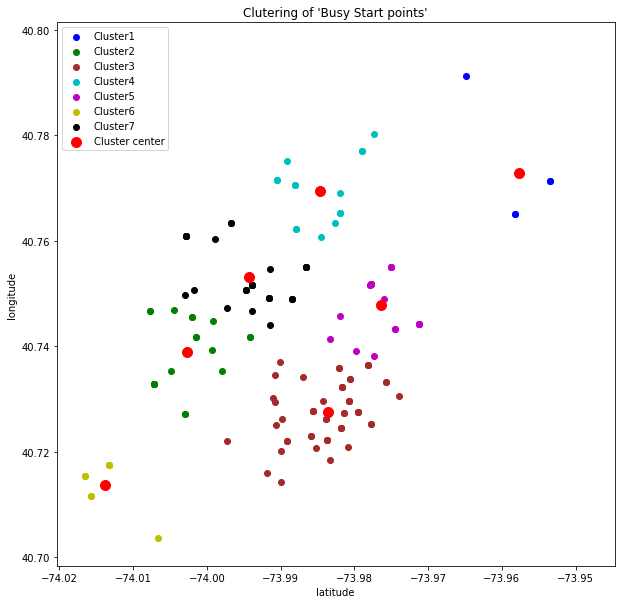

In [114]:
plot(start_points_kmeans, start_point_df, True)

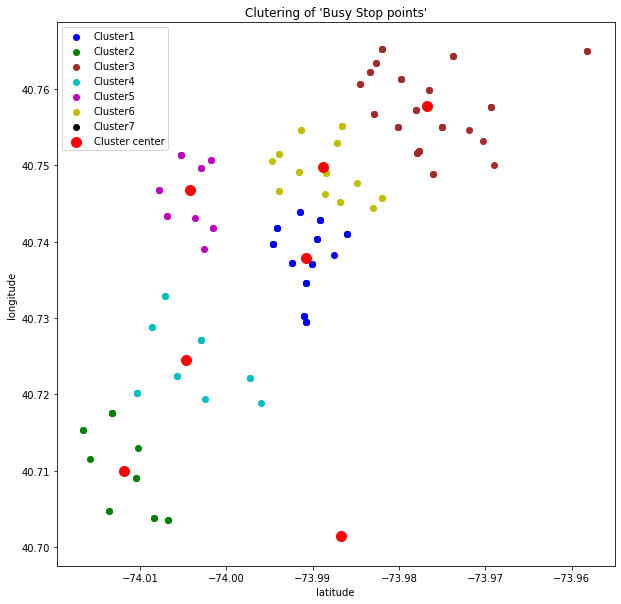

In [115]:
plot(stop_points_kmeans, stop_point_df, False)

In [119]:
from gmplot import gmplot

def google_plot(kmeans, df, isStart):
    gmap = gmplot.GoogleMapPlotter(40.75188406, -73.97770164, 13, "YOUR_TOKEN")
    labels = kmeans.labels_
    latitude, longitude = "", ""
    if isStart:
        latitude, longitude = "start station latitude", "start station longitude"
    else:
        latitude, longitude = "end station latitude", "end station longitude"
        
    xs = [[] for i in range(7)]
    ys = [[] for i in range(7)]
    index = 0
    
    for _, row in df.head(150).iterrows():
        xs[labels[index]].append(row[latitude])
        ys[labels[index]].append(row[longitude])
        index += 1
    
    
    xs_center = []
    ys_center = []
    for point in kmeans.cluster_centers_:
        xs_center.append(point[0])
        ys_center.append(point[1])
        
    
    colors = ["#00008B", "g", "brown", "c","m","goldenrod", "k"]
    
    for i in range(7):
        gmap.scatter(xs[i], ys[i], c=colors[i], size=50, marker=False)
    
    gmap.scatter(xs_center, ys_center, color = '#FF0000', size=100, marker=False, symbole='<')
    if isStart:
        gmap.draw("start_map.html")
    else:
        gmap.draw("stop_map.html")


google_plot(start_points_kmeans, start_point_df, True)
google_plot(stop_points_kmeans, stop_point_df, False)